# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [17]:
import pandas as pd
import numpy as np
#To get a sintaxis like R. also the results are displayed like in R
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
#Graphical module 
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
%matplotlib inline

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
heart_df=pd.read_csv("drive/MyDrive/Semestre8/Machine learning/Tareas/Tarea 2/heartDisease/framingham.csv")
#For drop missing values
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
print(f'Se tienen {len(heart_df)} observaciones.')

Se tienen 3749 observaciones.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

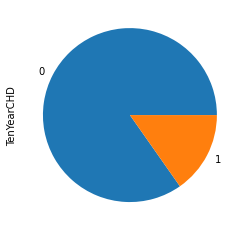

In [21]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [22]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]
#Firts we should make the MinMaxSacler, after, split the set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=22)

In [23]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [24]:
from sklearn.metrics import accuracy_score as ac
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #
print(f'Precisión inicial: {round(ac(y_test, y_pred, normalize=True, sample_weight=None)*100,4)}%')

Precisión inicial: 84.4%


#### Conclusiones
De acuerdo a la métrica ***Accuracy*** el modelo es capaz de clasificar correctamente el 84.13% de los datos. Por lo tanto, se puede considerar un buen modelo. No obstante, se recomienda analizar las métricas de ***Precision, Recall and Specificity***.

### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

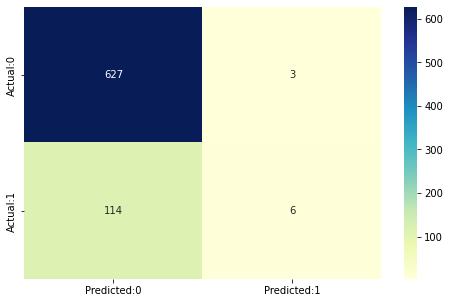

In [25]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [26]:
from sklearn.preprocessing import binarize

umbrales =[0.4,0.5,0.6,0.7] # Vector que Contiene los Umbrales a Analizar #
um = []
for umbral in umbrales:
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test)# Utilice la función predict_proba para calcular las probabilidades de pertenecer a la clase 1 #
    y_pred2 = binarize(y_pred_prob_yes, threshold=umbral)# Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    cm2 = confusion_matrix(y_test,y_pred2[:,1])
    #Error on line 3, [1,0] -> false negatives
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos negativos.
Sensitividad: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Especificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')



->Para un umbral de 0.4 tenemos esta matriz de confusión:
[[612  18]
 [104  16]]
Con 628 predicciones correctas y 104 falsos negativos.
Sensitividad: 0.1333 Especificidad: 0.9714

->Para un umbral de 0.5 tenemos esta matriz de confusión:
[[627   3]
 [114   6]]
Con 633 predicciones correctas y 114 falsos negativos.
Sensitividad: 0.05 Especificidad: 0.9952

->Para un umbral de 0.6 tenemos esta matriz de confusión:
[[629   1]
 [119   1]]
Con 630 predicciones correctas y 119 falsos negativos.
Sensitividad: 0.0083 Especificidad: 0.9984

->Para un umbral de 0.7 tenemos esta matriz de confusión:
[[629   1]
 [119   1]]
Con 630 predicciones correctas y 119 falsos negativos.
Sensitividad: 0.0083 Especificidad: 0.9984



Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

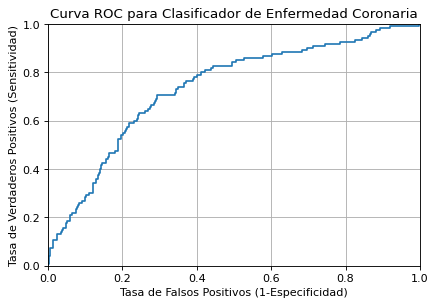

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.figure(dpi = 80)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)
plt.show()
#plt.legend(("0.4","0.5","0.6","0.7"))
plt.show()

Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.


#### Conclusión
Considerando el contexto del problema, clasificador de enferemdad coronaria a 10 años, se puede considerar que es preferible tener una mayor tasa de falso positivos que una tasa baja de verdaderos positivos. Por lo cual, observando la curva AUC-ROC, se puede considerar adecuado tomar una tasa de falsos positivos de 0.75, que genera una tasa de detección de verdaderos positivos de 0.92.


## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

<span style="color:red">En el proceso de probar el código, nos dimos cuenta que la posición en el vector de tasas se ve afectada por la semilla del generador aleatorio, de modo que una ***de las posiciones se ve favorecida por los datos que se toman para la estimación.*** </span>

############################################################################
Resultados para un modelo con tasa de aprendizaje de 0.3
Coeficientes:
[-4.84603162  0.12399625  2.31021122 -0.34642537  0.84048003  0.26044439
  0.90797422  0.37906089  0.52482711  1.21861746  3.80318024 -1.19745627
  0.93877734 -0.72236551  2.72583533]

Accuracy modelo actual: 84.26666666666667%
Recall: 5.8333%
Specificity: 99.2063%
Precision:58.3333%


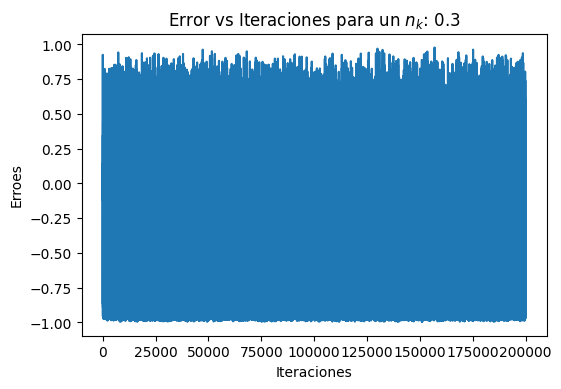

0.008485098986618311
############################################################################

############################################################################
Resultados para un modelo con tasa de aprendizaje de 0.003
Coeficientes:
[-3.86844723  0.57241124  2.30926353  0.09122066  0.58680201  0.33245778
  0.4056932   0.56375441  0.70385121  0.22252679  1.14882323  0.11640449
 -0.06002197 -0.2658155   0.86403374]

Accuracy modelo actual: 83.86666666666667%
Recall: 4.1667%
Specificity: 99.0476%
Precision:45.4545%


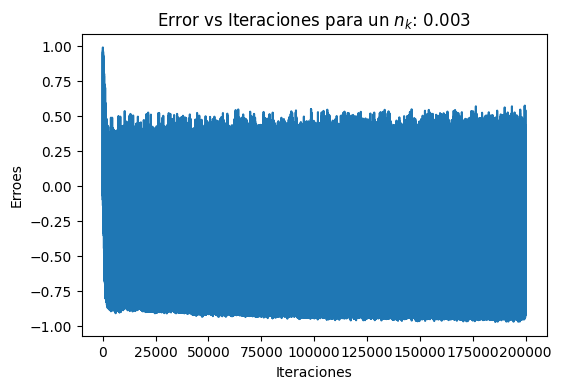

0.0001232829857884532
############################################################################

############################################################################
Resultados para un modelo con tasa de aprendizaje de 0.03
Coeficientes:
[-5.03792745  0.45888539  2.56749739  0.08601023  1.0469044   0.24966637
  0.38526567  0.19315754  0.125901    0.64213195  3.46556838 -0.33076275
  0.53731174 -0.33388998  2.70268369]

Accuracy modelo actual: 84.8%
Recall: 7.5%
Specificity: 99.5238%
Precision:75.0%


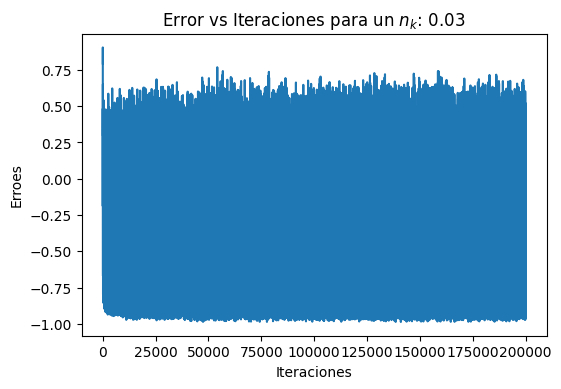

0.02705495597113572
############################################################################



In [28]:
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.shape[0]), x_train]
y_train_array = y_train.values

def sigma(w,x):
    res_sigmoid = 1/(1+np.exp(-np.dot(w,x)))
    return res_sigmoid

tasas = [0.3,0.003,0.03]# Defina un vector que contenga las tasas que desea probar #

N = 200000  # número máxmio de iteraciones
for tasa in tasas:
    iteraciones = 0
    w0 = np.random.rand(X_train_array.shape[1])
    w = w0.copy()
    #Selección de par aleatorio
    i = np.random.randint(0, len(X_train_array) - 1)
    xActual = X_train_array[i]
    yActual = y_train_array[i]
    errores = []
    # Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
    eps = 1e-7
    error = 100
    dif = 100
    while dif > eps and iteraciones < N:  # Criterio de parada 1 y 2 #
        # Dot product
        g = sigma(w0,xActual)
        # Error
        error = g - yActual
        errores.append(error)
        # Update of candidates on t
        w = w0 - tasa * error * xActual
        # Infinity norm vector 
        dif = np.linalg.norm(w - w0, ord=np.inf)
        # Update of candidates on t-1
        w0 = w
        # Take random one set to test on t+1
        i = np.random.randint(0, len(X_train_array) - 1)
        xActual = X_train_array[i]
        yActual = y_train_array[i]
        iteraciones += 1
    X_test_array = np.c_[np.ones(x_test.shape[0]), x_test]
    y_test_array = y_test.values
    
    y_pred = np.zeros(len(x_test))
    for i in range(0,len(x_test)):
        prob = sigma(w,X_test_array[i])
        if prob>0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    print("############################################################################")
    print(f"Resultados para un modelo con tasa de aprendizaje de {tasa}")
    print(f"Coeficientes:\n{w}\n")
    print(f'Accuracy modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)*100}%')
    cm2 = confusion_matrix(y_test,y_pred)
    print(f"Recall: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0]))*100, 4)}%")
    print(f"Specificity: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1]))*100, 4)}%")
    print(f"Precision:{round(cm2[1,1]/(float(cm2[1,1]+cm2[0,1]))*100, 4)}%")
    plt.figure(dpi=100)
    plt.plot(errores)
    plt.xlabel("Iteraciones")
    plt.ylabel("Erroes")
    plt.title(f"Error vs Iteraciones para un $n_k$: {tasa}")
    plt.show()
    print(dif)
    print("############################################################################\n")


## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

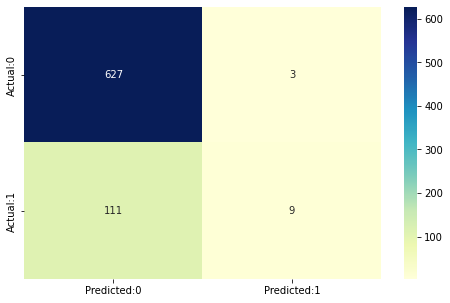

In [29]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### Conclusiones:

De acuerdo a la métrica **Accuracy** propuesta para definir el mejor modelo, con tasa de aprendizaje de 0.03 se obtuvo un accuracy de 84.8%. Sin embargo, analizando la matriz de confusión y los resultados de las métricas precision, recall & specificity, el modelo presenta falencias y puede indicar que un paciente no padece riesgo de tener una enfermedad coronaria  en 10 años, cuando realmente, si tiene un alto riesgo ***Recall = 7.5%***. En el contexto presentado, el modelo elegido debería considerar la métrica Recall por encima de la métrica Accuracy. En ese sentido, el mejor modelo, a pesar de tener el mejor recall, aún se puede considerar deficiente.